In [4]:
import gadm
import geopandas as gpd
from shapely.geometry import Point
import numpy
import pandas as pd
from gadm import GADMDownloader
from matplotlib import colors
import matplotlib.pyplot as plt

## Conversion between SPAM and GTAP

In [5]:
data = {
    "Code": ["pdr", "wht", "gro", "v_f", "osd", "c_b", "pfb", "ocr", "vol"],
    "Description": [
        "Rice: seed, paddy (not husked)",
        "Wheat: seed, other",
        "Other Grains: maize (corn), sorghum, barley, rye, oats, millets, other cereals",
        "Veg & Fruit: vegetables, fruit and nuts, roots and tubers",
        "Oil Seeds: oil seeds and oleaginous fruit",
        "Cane & Beet: sugar crops",
        "Fibre crops",
        "Other Crops: stimulants, aromatic crops, tobacco, etc.",
        "Vegetable Oils: margarine, oils from seeds"
    ],
    "Matching Crops": [
        "Rice",
        "Wheat",
        "Maize, Barley, Small Millet, Pearl Millet, Sorghum, Other Cereals",
        "Potato, Sweet Potato, Yams, Cassava, Other Roots, Bean, Chickpea, Cowpea, Banana, Plantain, Citrus, Tomato, Onion",
        "Soybean, Groundnut, Coconut, Sunflower, Rapeseed, Sesame Seed, Oil Palm, Other Oil Crops",
        "Sugarcane, Sugar beet",
        "Cotton, Other Fiber Crops, Rubber",
        "Pigeon Pea, Lentil, Other Pulses, Cocoa, Tea, Tobacco, Coffee (Arabic, Robust), Other Tropical Fruit, Temperate Fruit, Other Vegetables",
        "Coconut, Sunflower, Rapeseed, Sesame Seed, Oil Palm, Other Oil Crops (as applicable)"
    ],
    "Crop Codes": [
        "RICE_A",
        "WHEA_A",
        "MAIZ_A, BARL_A, PMIL_A, SORG_A, OCER_A, MILL_A",
        "POTA_A, SWPO_A, YAMS_A, CASS_A, ORTS_A, BEAN_A, CHIC_A, COWP_A, BANA_A, PLNT_A, CITR_A, TOMA_A, ONIO_A",
        "SOYB_A, GROU_A, CNUT_A, SUNF_A, RAPE_A, SESA_A, OILP_A, OOIL_A",
        "SUGC_A, SUGB_A",
        "COTT_A, OFIB_A, RUBB_A",
        "PIGE_A, LENT_A, OPUL_A, COCO_A, TEAS_A, TOBA_A, COFF_A, ROCOA_A, TROF_A, TEMF_A, VEGE_A, REST_A",
        "OILP_A, SUNF_A, RAPE_A, SESA_A"
    ]
}

# Create the DataFrame
conversion = pd.DataFrame(data)

conversion

,Code,Description,Matching Crops,Crop Codes
0,pdr,"Rice: seed, paddy (not husked)",Rice,RICE_A
1,wht,"Wheat: seed, other",Wheat,WHEA_A
2,gro,"Other Grains: maize (corn), sorghum, barley, r...","Maize, Barley, Small Millet, Pearl Millet, Sor...","MAIZ_A, BARL_A, PMIL_A, SORG_A, OCER_A, MILL_A"
3,v_f,"Veg & Fruit: vegetables, fruit and nuts, roots...","Potato, Sweet Potato, Yams, Cassava, Other Roo...","POTA_A, SWPO_A, YAMS_A, CASS_A, ORTS_A, BEAN_A..."
4,osd,Oil Seeds: oil seeds and oleaginous fruit,"Soybean, Groundnut, Coconut, Sunflower, Rapese...","SOYB_A, GROU_A, CNUT_A, SUNF_A, RAPE_A, SESA_A..."
5,c_b,Cane & Beet: sugar crops,"Sugarcane, Sugar beet","SUGC_A, SUGB_A"
6,pfb,Fibre crops,"Cotton, Other Fiber Crops, Rubber","COTT_A, OFIB_A, RUBB_A"
7,ocr,"Other Crops: stimulants, aromatic crops, tobac...","Pigeon Pea, Lentil, Other Pulses, Cocoa, Tea, ...","PIGE_A, LENT_A, OPUL_A, COCO_A, TEAS_A, TOBA_A..."
8,vol,"Vegetable Oils: margarine, oils from seeds","Coconut, Sunflower, Rapeseed, Sesame Seed, Oil...","OILP_A, SUNF_A, RAPE_A, SESA_A"


## Load SPAM

In [125]:
### Loading the data from:
##  https://www.dropbox.com/scl/fi/h55jfb53m8ba9wnbq6mtw/spam2020V1r0_global_production.csv.zip?rlkey=2elci8cauo4lazstnjc0nevi2&dl=0

In [6]:
data_agr = pd.read_csv('C://Users/dadel/Downloads/spam2020V1r0_global_P_TA.csv')

In [7]:
columns_to_sum = data_agr.filter(like='_A').columns

# Total production um these columns row-wise
data_agr['sum_agr'] = data_agr[columns_to_sum].sum(axis=1)

In [8]:
data_agr

,grid_code,x,y,FIPS0,FIPS1,FIPS2,ADM0_NAME,ADM1_NAME,ADM2_NAME,rec_type,...,TEAS_A,TEMF_A,TOBA_A,TOMA_A,TROF_A,VEGE_A,WHEA_A,YAMS_A,year_data,sum_agr
0,1037554,-117.125000,69.958298,CA,CA06,CA06001,Canada,Northwest Territories / Territoires du Nord-Ouest,Region 1,P,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,avg(2019-2021),0.8
1,1039675,59.625000,69.958298,RS,RS45,RS45001,Russian Federation,Nenets Autonomous Okrug,Nenets Autonomous Okrug,P,...,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,avg(2019-2021),0.1
2,1039682,60.208301,69.958298,RS,RS45,RS45001,Russian Federation,Nenets Autonomous Okrug,Nenets Autonomous Okrug,P,...,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,avg(2019-2021),0.1
3,1039683,60.291699,69.958298,RS,RS45,RS45001,Russian Federation,Nenets Autonomous Okrug,Nenets Autonomous Okrug,P,...,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,avg(2019-2021),0.1
4,1043999,59.958301,69.875000,RS,RS45,RS45001,Russian Federation,Nenets Autonomous Okrug,Nenets Autonomous Okrug,P,...,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,avg(2019-2021),0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514189,7080350,169.207993,-46.541699,NZ,NZ14,NZ14003,New Zealand,Southland,Southland dist,P,...,0.0,13.6,0.0,0.1,4.4,49.3,0.1,0.0,avg(2019-2021),201.8
514190,7084668,169.042007,-46.625000,NZ,NZ14,NZ14003,New Zealand,Southland,Southland dist,P,...,0.0,17.3,0.0,0.1,4.9,179.8,0.4,0.0,avg(2019-2021),2234.9
514191,7084669,169.125000,-46.625000,NZ,NZ14,NZ14003,New Zealand,Southland,Southland dist,P,...,0.0,14.9,0.0,0.1,4.7,73.7,0.2,0.0,avg(2019-2021),319.1
514192,7084670,169.207993,-46.625000,NZ,NZ14,NZ14003,New Zealand,Southland,Southland dist,P,...,0.0,1.6,0.0,0.1,0.3,1.7,0.1,0.0,avg(2019-2021),13.1


In [ ]:
## Aggregate according to the conversion table

In [9]:
column_groups = {
    "pdr": ["RICE_A"],
    "wht": ["WHEA_A"],
    "gro": ["MAIZ_A", "BARL_A",  "PMIL_A", 'MILL_A',"SORG_A", "OCER_A"],
    "v_f": ["POTA_A", "SWPO_A", "YAMS_A", "CASS_A", "ORTS_A", "BEAN_A", "CHIC_A", "COWP_A", "BANA_A", "PLNT_A", "CITR_A", "TOMA_A", "ONIO_A"],
    "osd": ["SOYB_A", "GROU_A",  "COCO_A", "SUNF_A", "RAPE_A", "SESA_A", "OILP_A", "OOIL_A", "CNUT_A"],
    "c_b": ["SUGC_A", "SUGB_A"],
    "pfb": ["COTT_A", "OFIB_A", "RUBB_A"],
    "ocr": ["PIGE_A", "LENT_A", "OPUL_A", "COCO_A", "TEAS_A", "TOBA_A", "COFF_A", "RCOF_A", "TROF_A", "TEMF_A", "VEGE_A", "REST_A"],
    "vol": ["OILP_A", "SUNF_A", "RAPE_A", "SESA_A"]
}

# Aggregate columns by summing within each group and replacing with new names
for new_col, cols_to_sum in column_groups.items():
    data_agr[new_col] = data_agr[cols_to_sum].sum(axis=1)

# Drop the original individual columns that have been aggregated
columns_to_drop = [col for cols in column_groups.values() for col in cols]
data_agr = data_agr.drop(columns=columns_to_drop)

# Display the updated DataFrame
data_agr.head()

,grid_code,x,y,FIPS0,FIPS1,FIPS2,ADM0_NAME,ADM1_NAME,ADM2_NAME,rec_type,...,sum_agr,pdr,wht,gro,v_f,osd,c_b,pfb,ocr,vol
0,1037554,-117.125000,69.958298,CA,CA06,CA06001,Canada,Northwest Territories / Territoires du Nord-Ouest,Region 1,P,...,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.0,0.0
1,1039675,59.625000,69.958298,RS,RS45,RS45001,Russian Federation,Nenets Autonomous Okrug,Nenets Autonomous Okrug,P,...,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0
2,1039682,60.208301,69.958298,RS,RS45,RS45001,Russian Federation,Nenets Autonomous Okrug,Nenets Autonomous Okrug,P,...,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0
3,1039683,60.291699,69.958298,RS,RS45,RS45001,Russian Federation,Nenets Autonomous Okrug,Nenets Autonomous Okrug,P,...,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0
4,1043999,59.958301,69.875000,RS,RS45,RS45001,Russian Federation,Nenets Autonomous Okrug,Nenets Autonomous Okrug,P,...,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0


## Aggregate agricultural production with spatial information

In [149]:
def aggregate_production_by_region(data_agr, 
                                   countries, 
                                   admin_level=2,
                                  ):
    #Filter data based on specified countries
    filtered_data = data_agr[data_agr['ADM0_NAME'].isin(countries)]

    # Initialize downloader and storage for country geodata
    downloader = GADMDownloader(version="4.0")
    country_gdfs = []

    # Download and aggregate geometries for each country
    for country_name in countries:
        try:
            # Attempt to download at specified admin level (default to level 2)
            gdf = downloader.get_shape_data_by_country_name(country_name=country_name, ad_level=admin_level)
            gdf["ID"] = gdf["ID_2"]
        except Exception as e:
            print(f"Level {admin_level} data not available for {country_name}, trying lower level")
            try:
                # If higher admin level fails, try level 1
                gdf = downloader.get_shape_data_by_country_name(country_name=country_name, ad_level=1)
                gdf["ID"] = gdf["ID_1"]  # Set HASC_2 to 1 for countries with no admin level 2
            except Exception as e:
                print(f"Could not download data for {country_name} at level 1: {e}")
                continue
        country_gdfs.append(gdf)

    #Combine all country GeoDataFrames
    combined_gdf = gpd.GeoDataFrame(pd.concat(country_gdfs, ignore_index=True))

    #Ensure CRS
    combined_gdf.set_crs(epsg=4326, inplace=True, allow_override=True)
    combined_gdf["keep_pol"] = combined_gdf["geometry"]

    #Prepare GeoDataFrame
    geometry = [Point(xy) for xy in zip(filtered_data['x'], filtered_data['y'])]
    geo_df = gpd.GeoDataFrame(filtered_data, geometry=geometry, crs="EPSG:4326")

    # Spatial join to link production data points to region polygons
    new_dat = gpd.sjoin(geo_df, combined_gdf, how="left", predicate="within")

    # Aggregate production data by region
    aggregated_data = new_dat.groupby(['keep_pol', "ID"]).agg({
        'sum_agr': 'sum', 
        'pdr': 'sum',
        'wht': 'sum', 
        'gro': 'sum', 
        'v_f': 'sum',
        'osd': 'sum',
        'c_b': 'sum', 
        'pfb': 'sum', 
        'ocr': 'sum', 
        'vol': 'sum'
    }).reset_index()

    #Merge back with the combined GeoDataFrame to ensure no regions are missing (and keep IDs)
    new_gdf = combined_gdf.merge(aggregated_data, on= ["keep_pol"], how="left")
    
    #new_gdf = gpd.GeoDataFrame(aggregated_data, geometry='keep_pol')

    # Ensure that the new GeoDataFrame has a valid CRS (coordinate reference system)
    # Assuming the original data uses EPSG:4326 (latitude/longitude)
    new_gdf = new_gdf[['keep_pol', 'ID_y', 'sum_agr', 'pdr', 'wht', 'gro', 'v_f',
       'osd', 'c_b', 'pfb', 'ocr', 'vol']]
    new_gdf = gpd.GeoDataFrame(aggregated_data, geometry='keep_pol')
    new_gdf.set_crs(epsg=4326, allow_override=True)
    
    #Fill NaN production values with 0 for empty regions
    production_cols = ['sum_agr', 'pdr', 'wht', 'gro', 'v_f', 'osd', 'c_b', 'pfb', 'ocr', 'vol']
    new_gdf[production_cols] = new_gdf[production_cols].fillna(0)

    #Generate a GeoDataFrame with centroids
    centroid_gdf = new_gdf.copy()
    centroid_gdf["keep_pol"] = centroid_gdf["keep_pol"].centroid

    # Ensure CRS
    new_gdf.set_crs(epsg=4326, allow_override=True)
    centroid_gdf.set_crs(epsg=4326, allow_override=True)
    
    centroid_gdf.to_file("agr_prod.geojson", driver="GeoJSON")
    
    return new_gdf


In [154]:
iso_country_codes = ['Georgia', "Turkmenistan", "Turkey", "Tajikistan", 
                     "Azerbaijan", "Kazakhstan", "Uzbekistan", "Armenia", 
                    "Kyrgyzstan"] 

In [155]:
A = aggregate_production_by_region(data_agr,
                                     iso_country_codes,
                                     admin_level = 2)

Level 2 data not available for Armenia, trying lower level


C:\Users\dadel\AppData\Local\Temp\ipykernel_14084\1533269808.py:75: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid_gdf["keep_pol"] = centroid_gdf["keep_pol"].centroid


<AxesSubplot:>

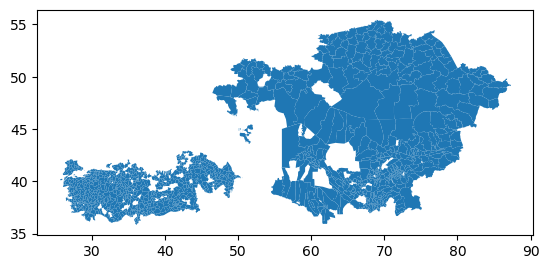

In [156]:
A.plot()

## Visualize results

In [157]:
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
gdf_world_real = gpd.read_file(url)

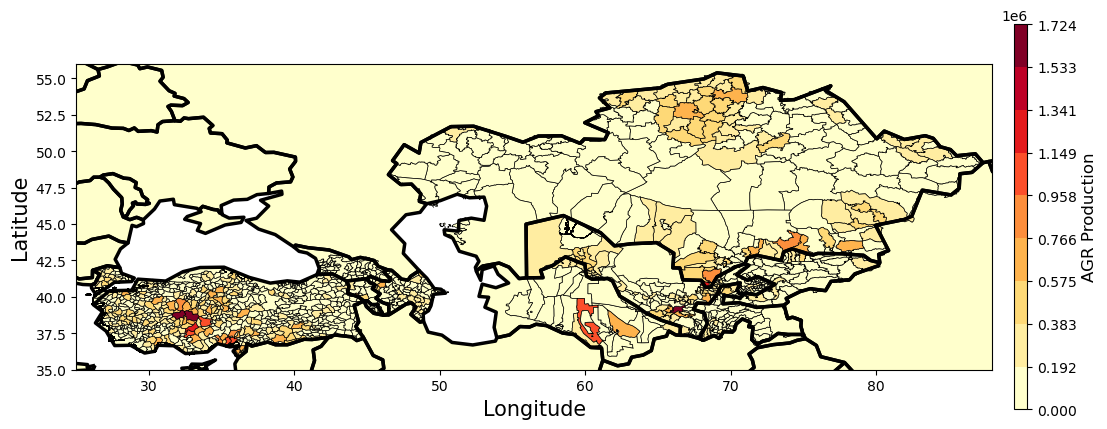

In [158]:
new_gdf = A

if new_gdf.crs != 'EPSG:4326':
    new_gdf = new_gdf.to_crs(epsg=4326)
full_gdf = gpd.overlay(gdf_world_real, new_gdf, how='union', keep_geom_type=False)
full_gdf['sum_agr'] = full_gdf['sum_agr'].fillna(0)
full_gdf['log_sum_agr'] = full_gdf['sum_agr']
bins = np.linspace(0, full_gdf['log_sum_agr'].max(), 10)
norm = colors.BoundaryNorm(bins, ncolors=256, clip=True)
fig, ax = plt.subplots(figsize=(12, 8))  # Adjust figure size
ax.set_aspect('equal') 

# Plot the world boundaries
gdf_world_real.boundary.plot(ax=ax, linewidth=2.5, color='black')  # Thicker lines for country borders

# Plot the choropleth map on top of the world boundaries
full_gdf.plot(
    ax=ax,                      
    column='log_sum_agr',       
    cmap='YlOrRd',              
    norm=norm,                  
    legend=False,               
    edgecolor='black',          
    linewidth=0.5               
)
sm = plt.cm.ScalarMappable(cmap='YlOrRd', norm=norm)
sm._A = [] 
# Adjust the color bar with a smaller size and position it better
cbar = plt.colorbar(sm, ax=ax, shrink=0.5, aspect=30, pad=0.02)  
cbar.set_label('AGR Production', fontsize=12)

# Set title and labels
ax.set_xlim([25, 88])  # Longitude limits (adjust to your region)
ax.set_ylim([35, 56])  # Latitude limits (adjust to your region)

#plt.title('AGR Production', fontsize=20)
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize=15)

# Step 9: Display the plot with tight layout to avoid any extra white space
plt.tight_layout()
plt.show()
